### Background

This is a followup on the 2022 Khumaltar pollution level analysis, done for 2023.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

# change the default runtime configurations
plt.rc('axes',linewidth=2,titlesize=20,labelsize=16,labelpad=5)
plt.rc('xtick',labelsize=12,top=False)
plt.rc('ytick',labelsize=12,right=False)
plt.rc('legend',fontsize='medium',framealpha=0.6,markerscale=2)
plt.rc('font',family='Arial')
plt.rc('mathtext',fontset='stix',default='it')
plt.rcParams['font.family'] = 'Sans Serif'
plt.rcParams['mathtext.fontset']='stix'

# Set a nice style
sns.set_style("darkgrid")

### Load the dataset, clean it up

In [2]:
station_loc = 'Khumaltar'
data = pd.read_excel('daily-average-data-2023-all-stations-1717580574.xlsx',sheet_name=station_loc)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   PM2.5   355 non-null    float64
 2   PM10    355 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [4]:
# Count nulls in each column
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
date      0
PM2.5    10
PM10     10
dtype: int64


In [5]:
# Check if any value is missing in the entire DataFrame
print("\nAny missing values in the DataFrame?")
print(data.isnull().values.any())


Any missing values in the DataFrame?
True


In [6]:
data.head()

,date,PM2.5,PM10
0,2023-01-01,NaN,NaN
1,2023-01-02,NaN,NaN
2,2023-01-03,79.391560,122.638365
3,2023-01-04,72.903476,118.191242
4,2023-01-05,69.048247,115.037608


In [7]:
df_ = data.dropna()
df_.head()

,date,PM2.5,PM10
2,2023-01-03,79.391560,122.638365
3,2023-01-04,72.903476,118.191242
4,2023-01-05,69.048247,115.037608
5,2023-01-06,83.780244,157.171654
6,2023-01-07,82.265515,161.350902


Since only 10 days of data is missing, we know all 12 months must be here. Great news!

In [8]:
df = df_.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    355 non-null    object 
 1   PM2.5   355 non-null    float64
 2   PM10    355 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.1+ KB


In [10]:
num_days = df['PM2.5'].count()
num_days

np.int64(355)

In [11]:
print(f'Data available for {num_days/365:.0%} of the days! Much improved from 2022.')

Data available for 97% of the days! Much improved from 2022.


In [12]:
df.describe()

,PM2.5,PM10
count,355.000000,355.000000
mean,46.016549,88.279139
std,29.339002,61.277698
min,4.590454,6.163391
25%,18.246228,30.518243
50%,43.172492,76.436934
75%,69.581316,139.026719
max,122.428423,263.187244


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.head()

,date,PM2.5,PM10
2,2023-01-03,79.391560,122.638365
3,2023-01-04,72.903476,118.191242
4,2023-01-05,69.048247,115.037608
5,2023-01-06,83.780244,157.171654
6,2023-01-07,82.265515,161.350902


Let's add month columns to generate some month-by-month comparisons

In [15]:
df['month'] = df['date'].dt.month
# Add month name (full name)
df['month_name'] = df['date'].dt.month_name()

In [16]:
df

,date,PM2.5,PM10,month,month_name
2,2023-01-03,79.391560,122.638365,1,January
3,2023-01-04,72.903476,118.191242,1,January
4,2023-01-05,69.048247,115.037608,1,January
5,2023-01-06,83.780244,157.171654,1,January
6,2023-01-07,82.265515,161.350902,1,January
...,...,...,...,...,...
360,2023-12-27,50.022295,80.843126,12,December
361,2023-12-28,41.096830,69.747470,12,December
362,2023-12-29,48.213570,82.286515,12,December
363,2023-12-30,57.931794,93.062578,12,December


In [17]:
df.isnull().sum()

date          0
PM2.5         0
PM10          0
month         0
month_name    0
dtype: int64

In [18]:
df.isna().sum()

date          0
PM2.5         0
PM10          0
month         0
month_name    0
dtype: int64

## Analysis and plots

We'll focus only on the PM$_{2.5}$ levels here

In [19]:
# what is the annual average
yearly_stats = df['PM2.5'].agg(['mean', 'max', 'min', 'std'])
print(yearly_stats)

mean     46.016549
max     122.428423
min       4.590454
std      29.339002
Name: PM2.5, dtype: float64


Yearly average is $46-35=11~\mu g / m^3$ above the Interim Target I.

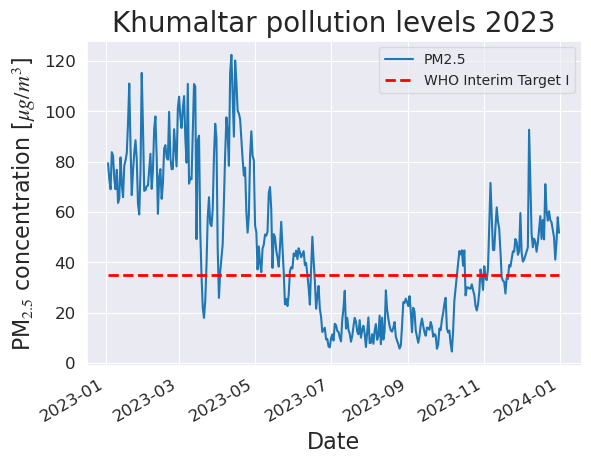

In [20]:
# plot the pollution levels
fig, ax = plt.subplots()
df.plot(y='PM2.5',x='date',ax=ax)
# add in the WHO Interim Target I line
ax.hlines(35,df['date'].min(),df['date'].max(),lw=2.0,color='r', linestyle='--',label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_ylabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
ax.set_xlabel('Date')
ax.legend()
plt.show()

There are days when the pollution level is $4\times$ the WHO Interim Target I value.

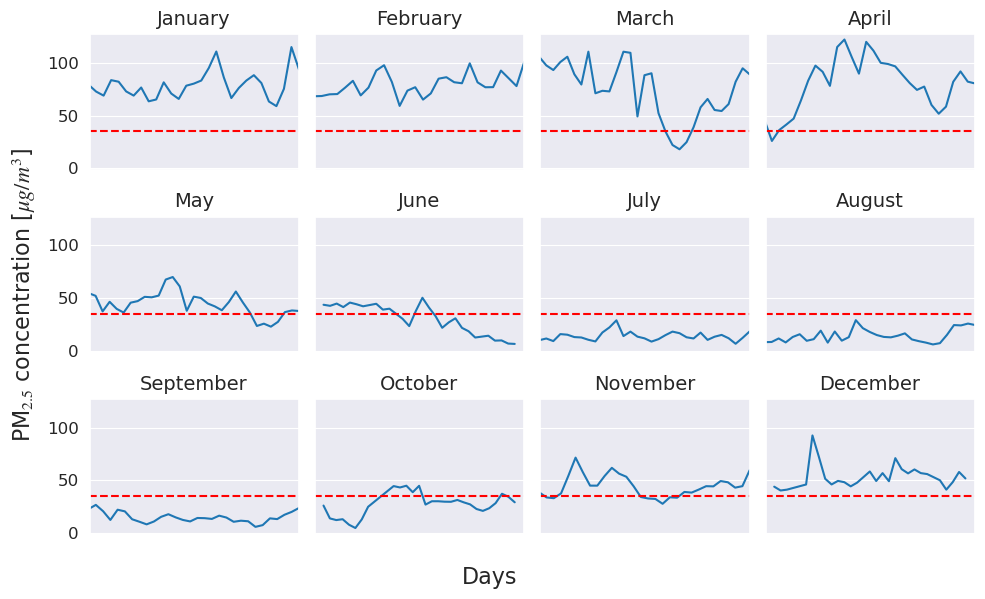

In [21]:
# let's look at how the PM2.5 levels fluctuated every month in Khumaltar
fig_monthly_plt, axes = plt.subplots(3, 4, sharey=True, figsize=(10, 6))
axes = axes.flatten()

for month in range(1, 13):
    # select the months and plot them
    month_data = df[df['date'].dt.month == month]
    month_data.plot(x='date', y='PM2.5', ax=axes[month-1], legend=False)
    axes[month-1].set_title(calendar.month_name[month],fontsize=14)
    axes[month-1].axhline(y=35, color='r', linestyle='--')
    axes[month-1].get_xaxis().set_visible(False)  # Hide entire x-axis

fig_monthly_plt.supylabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]',fontsize=16)
fig_monthly_plt.supxlabel('Days',fontsize=16)
plt.tight_layout()
plt.show()

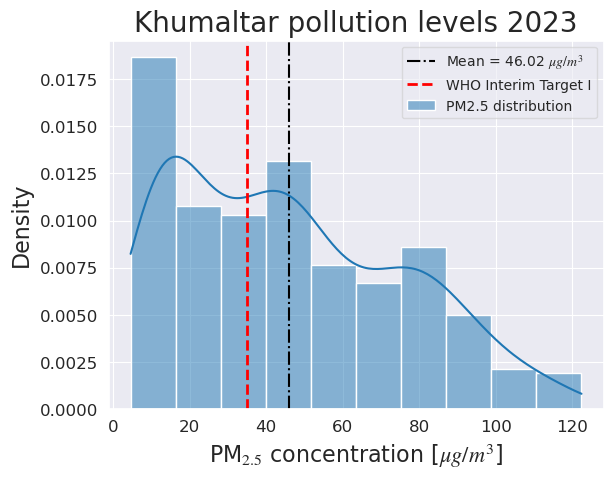

In [22]:
# histogram with KDE overlay
fig_dist, ax = plt.subplots()
sns.histplot(data=df['PM2.5'], stat='density', kde=True, label='PM2.5 distribution', ax=ax)
ax.axvline(df['PM2.5'].mean(),color='k',linestyle='-.',label=rf'Mean = {df['PM2.5'].mean():.2f} $\mu g / m^3$')
ax.axvline(35,lw=2.0,color='r', linestyle='--',label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_xlabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
ax.legend()
plt.show()

You can visualize both the histogram and the KDE at once or turn off the `kde=True` and look at separate KDE plot as shown below. Multiple KDEs make comparisons easier than with histograms.

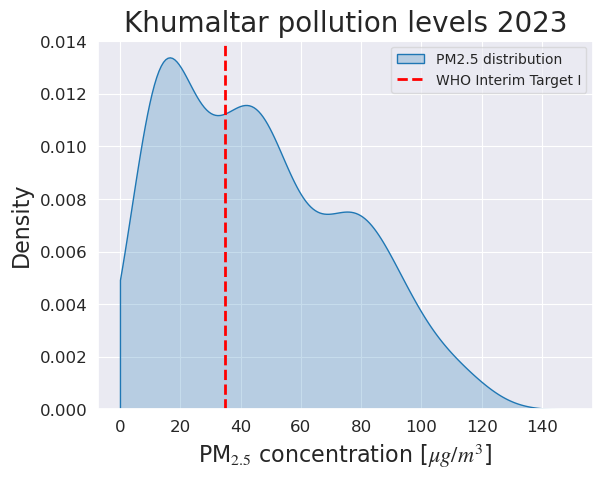

In [23]:
# smooth histogram
fig_dist, ax = plt.subplots()
sns.kdeplot(data=df['PM2.5'],clip=(0, None),fill=True,ax=ax,label='PM2.5 distribution')
ax.axvline(35,lw=2.0,color='r', linestyle='--',label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_xlabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
ax.legend()
plt.show()

In most of the days, PM$_{2.5}$ concentration is above the Interim Target I threshold value. 

In [24]:
# Group by month and calculate statistics
monthly_stats = df.groupby('month')['PM2.5'].agg(['mean', 'max', 'min', 'std'])
monthly_stats

,mean,max,min,std
month,,,,
1,79.039922,115.250229,59.042239,13.100961
2,79.668490,101.256409,59.263748,10.536067
3,73.997378,110.886518,17.959981,27.595385
4,80.102598,122.428423,25.905586,25.407805
5,44.199052,69.930541,22.697855,11.559246
6,30.929638,50.194902,6.269916,13.718256
7,13.711584,28.731250,6.419603,4.442888
8,14.224709,28.890289,5.780979,6.312148
9,14.790083,26.611590,5.691065,5.053984


The max values show that the PM$_{2.5}$ levels gets quite high in months except for June-October.

June-October, average pollutions levels are okay in comparison to the Interim Target I. More plots below!

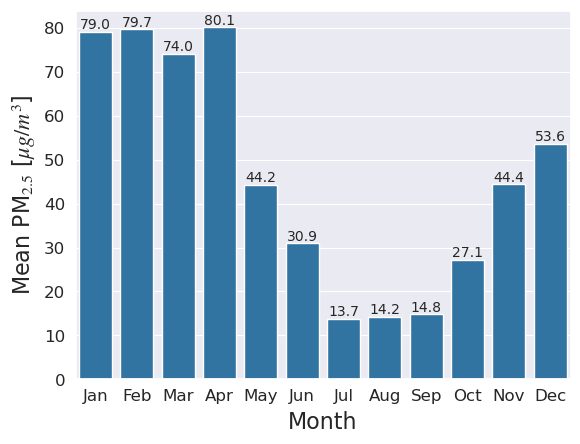

In [25]:
# get the monthly means
fig_monthly_means, ax = plt.subplots()

sns.barplot(x='month', y='mean', data=monthly_stats, ax=ax)
ax.set_ylabel(r'Mean PM$_{2.5}$ [$\mu g / m^3$]')
ax.set_xlabel('Month')
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10)

# work with current axis
ax = plt.gca()
# Get current tick positions where we will put the abbreviated months as labels
tick_positions = ax.get_xticks()
# Create month labels for the actual months in the data.
labels = [calendar.month_abbr[i] for i in range(1, 13)]
# Set ticks first, then labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels)

plt.show()

### Monthly distributions

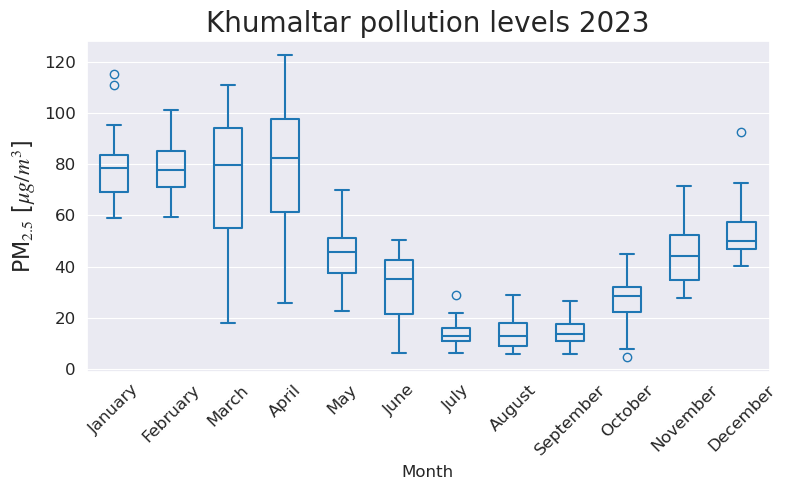

In [26]:
# Create a simple boxplot using seaborn
fig_bxplt, ax=plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='month_name', y='PM2.5', ax=ax, width=0.5,fill = False, gap=0.01)
# ax.axhline(y=35, color='r', linestyle='--', linewidth=2, label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel(r'PM$_{2.5}$ [$\mu g / m^3$]')
plt.xticks(rotation=45)
# ax.legend()
plt.tight_layout()
plt.show()

The boxplot above looks clean and pretty good, but I wanted to see if this can be improved. Below, the boxes are colored by the median PM$_{2.5}$ concentration for the month.

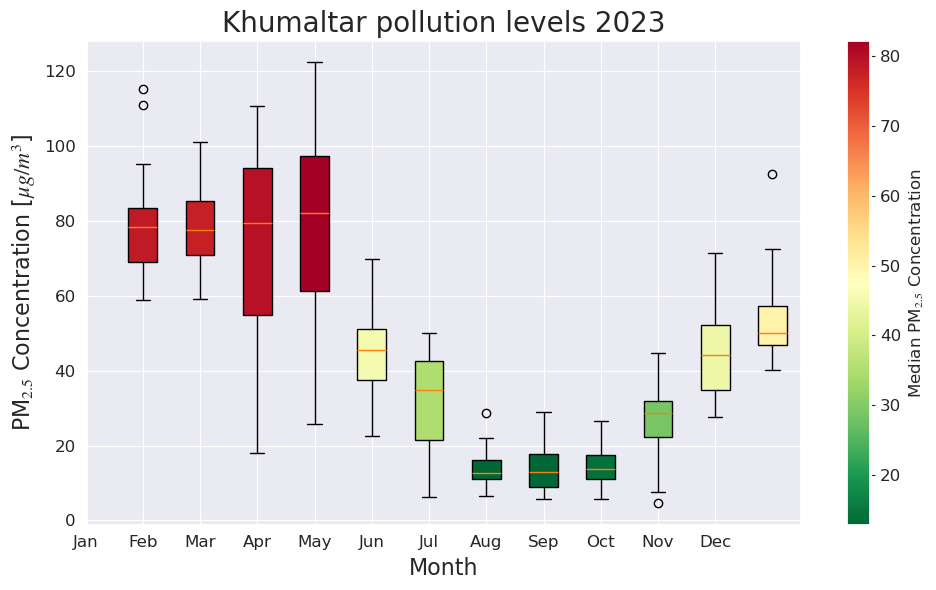

In [27]:
# Calculate median for each month for coloring
monthly_median = df.groupby('month')['PM2.5'].median()

# Create colormap
cmap = plt.cm.RdYlGn_r  # red=high pollution
norm = plt.Normalize(vmin=monthly_median.min(), vmax=monthly_median.max())
colors = [cmap(norm(value)) for value in monthly_median]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot([df[df['month'] == m]['PM2.5'] for m in range(1, 13)],
                 patch_artist=True,
                 tick_labels=range(1, 13))

# Color each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_xlabel('Month')
ax.set_ylabel(r'PM$_{2.5}$ Concentration [$\mu g / m^3$]')

# put abbreviated month names instead of numbers as in 2022 plot
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'Median PM$_{2.5}$ Concentration', fontsize=12)
plt.tight_layout()
plt.show()

Above, the boxplots are colored based on monthly median PM$_{2.5}$ levels.

Violin plots give another way of visualizing this information.

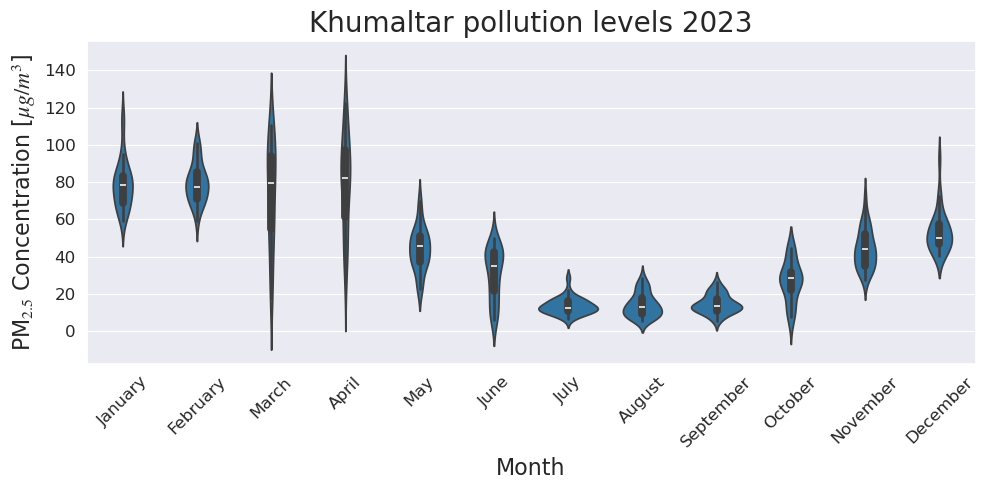

In [28]:
fig, ax=plt.subplots(figsize=(10, 5))
sns.violinplot(data=df, ax=ax, x='month_name', y='PM2.5')
# ax.axhline(y=35, color='r', linestyle='--', linewidth=2, label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels 2023')
ax.set_xlabel('Month')
ax.set_ylabel(r'PM$_{2.5}$ Concentration [$\mu g / m^3$]')
plt.xticks(rotation=45)
# ax.legend()
plt.tight_layout()
plt.show()

### Lastly, let's take a look at what % of days each month was the PM$_{2.5}$ level greater than the interim target value of $35 \mu g / m^3$

In [29]:
monthly_counts = df.groupby('month_name').size()
print(monthly_counts)

month_name
April        30
August       31
December     27
February     28
January      29
July         31
June         29
March        31
May          31
November     30
October      28
September    30
dtype: int64


In [30]:
monthly_counts = df.groupby('month').size()
print(monthly_counts)

month
1     29
2     28
3     31
4     30
5     31
6     29
7     31
8     31
9     30
10    28
11    30
12    27
dtype: int64


Above - Data was collected for that many days each month.

In [31]:
high_values = df[df['PM2.5'] > 35]
high_pollution_days = high_values.groupby('month').size()
print(high_pollution_days)

month
1     29
2     28
3     27
4     29
5     27
6     14
10     6
11    22
12    27
dtype: int64


In [32]:
# Count and calculate the percentage
# applying a function where the values greater than 35 are counted
monthly_stats_2 = df.groupby('month')['PM2.5'].agg([
    ('total', 'count'),
    ('above_35', lambda x: (x > 35).sum())
])
monthly_stats_2['percentage'] = (monthly_stats_2['above_35'] / monthly_stats_2['total'] * 100).round(1)
print(monthly_stats_2)

       total  above_35  percentage
month                             
1         29        29       100.0
2         28        28       100.0
3         31        27        87.1
4         30        29        96.7
5         31        27        87.1
6         29        14        48.3
7         31         0         0.0
8         31         0         0.0
9         30         0         0.0
10        28         6        21.4
11        30        22        73.3
12        27        27       100.0


Above - PM$_{2.5}$ concentration exceeded the Interim Target I in these many days.

In [33]:
# new dataframe
monthly_stats_2

,total,above_35,percentage
month,,,
1,29,29,100.0
2,28,28,100.0
3,31,27,87.1
4,30,29,96.7
5,31,27,87.1
6,29,14,48.3
7,31,0,0.0
8,31,0,0.0
9,30,0,0.0


In [34]:
# another way of filtering the high pollution days
high_values = df[df['PM2.5'] > 35]
high_pollution = high_values.groupby('month').size()
print(high_pollution)

month
1     29
2     28
3     27
4     29
5     27
6     14
10     6
11    22
12    27
dtype: int64


In [35]:
total_days = df.groupby('month')['PM2.5'].size()
print(total_days)

month
1     29
2     28
3     31
4     30
5     31
6     29
7     31
8     31
9     30
10    28
11    30
12    27
Name: PM2.5, dtype: int64


In [36]:
percentage = ((high_pollution / total_days) * 100).round(1)
print(percentage)

month
1     100.0
2     100.0
3      87.1
4      96.7
5      87.1
6      48.3
7       NaN
8       NaN
9       NaN
10     21.4
11     73.3
12    100.0
dtype: float64


## Summary

__From November to May, pollution levels at Khumaltar station did not meet the WHO Interim Target I in the majority of the days.__

__From June to October, the situation improves quite well - particularly during the monsoon months.__

__Data was available for more months in 2023 which is awesome!__